<a href="https://colab.research.google.com/github/Witcape/AI_Practice/blob/main/graph_rag_final_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair

In [2]:
# import os
# import time
# import networkx as nx
# import google.generativeai as genai
# from langchain_experimental.graph_transformers import LLMGraphTransformer
# from langchain_google_genai import GoogleGenerativeAI
# from langchain.chains import GraphQAChain
# from langchain_core.documents import Document
# from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

In [3]:
# import google.generativeai as genai
# from google.colab import userdata

# GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
# genai.configure(api_key=GOOGLE_API_KEY)
# llm = GoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)

In [4]:
# # Input text
# doc_text = """
# A traveler, John Doe, lost his black Samsonite suitcase at JFK Airport on February 20th.
# He last saw it at the security checkpoint in Terminal 4 before proceeding to Gate B22 for his flight to London.
# The suitcase contains important documents, a laptop, and personal belongings.
# Airport security reviewed footage from multiple CCTV cameras along the route from security to the boarding gate.
# It was last seen near a coffee shop in the terminal before disappearing from view.
# The airport authorities are investigating whether it was misplaced, stolen, or mistakenly taken by another passenger.
# """

# documents = [Document(page_content=doc_text)]

In [5]:
# # Initialize the Graph Transformer
# llm_transformer = LLMGraphTransformer(llm=llm)
# graph_documents = llm_transformer.convert_to_graph_documents(documents)

# # Filter Graph Transformer
# llm_transformer_filtered = LLMGraphTransformer(
#     llm=llm,
#     allowed_nodes=["Person", "Item", "Location", "Event"],
#     allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS"],
# )
# graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# # Create NetworkX Graph
# graph = NetworkxEntityGraph()

In [6]:
# # Add nodes to the graph
# for node in graph_documents_filtered[0].nodes:
#     graph.add_node(node.id)

# # Add edges to the graph
# for edge in graph_documents_filtered[0].relationships:
#     graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)


In [7]:
# # Initialize the GraphQAChain
# chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

In [8]:
# # Query the graph
# question = "Where was john doe's suitcase seen?"
# response = chain.run(question)
# print(response)

In [9]:
!pip install langchain-experimental langchain-community langchain networkx langchain-google-genai langchain-core json-repair matplotlib

In [10]:
import os
import time
import networkx as nx
import matplotlib.pyplot as plt
import google.generativeai as genai
from langchain_experimental.graph_transformers import LLMGraphTransformer
from langchain_google_genai import GoogleGenerativeAI
from langchain.chains import GraphQAChain  # Fixed import
from langchain_core.documents import Document
from langchain_community.graphs.networkx_graph import NetworkxEntityGraph

In [11]:
import google.generativeai as genai
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)
llm = GoogleGenerativeAI(model="gemini-pro", google_api_key=GOOGLE_API_KEY)

In [23]:
# Input text - Lost suitcase scenario
text = """
Incident Report: Lost Suitcase at JFK Airport

John Doe, a traveler, reported losing his black Samsonite suitcase at JFK Airport on February 20th at 3:45 PM.
He last physically saw the suitcase at the security checkpoint in Terminal 4 at 3:30 PM before proceeding towards Gate B22 for his flight to London.

The suitcase was recorded on CCTV footage at 3:35 PM near the duty-free store, and at 3:40 PM near a coffee shop in Terminal 4.
At 3:50 PM, security footage showed an unknown individual picking up a suitcase near the coffee shop and walking towards the exit.

The airport authorities and security team are currently investigating the case, reviewing CCTV footage, and checking passenger logs to determine whether it was misplaced, stolen, or mistakenly taken by another passenger.
"""

documents = [Document(page_content=text)]

In [24]:
# Initialize the Graph Transformer
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

In [25]:
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Item", "Location", "Event", "Time"],
    allowed_relationships=["LAST_SEEN_AT", "PICKED_UP_BY", "RECORDED_BY"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

In [26]:
# Create NetworkX Graph
graph = NetworkxEntityGraph()

In [27]:
# Manually add nodes and edges
for doc in graph_documents_filtered:
    for node in doc.nodes:
        graph._graph.add_node(node.id, type=node.type)
    for edge in doc.relationships:
        graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

In [28]:
# # AUTOMATIC NODE GEN

# for doc in graph_documents:
#     for node in doc.nodes:
#         graph._graph.add_node(node.id, label=node.type)
#     for edge in doc.relationships:
#         graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

In [29]:
# Debug: Print extracted graph structure
print("\nExtracted Graph Documents:\n", graph_documents)
print("\nGenerated Graph Nodes:", graph._graph.nodes(data=True))
print("\nGenerated Graph Edges:", graph._graph.edges(data=True))


Extracted Graph Documents:
 [GraphDocument(nodes=[Node(id='unknown individual', type='Person', properties={}), Node(id='passenger logs', type='Document', properties={}), Node(id='John Doe', type='Person', properties={}), Node(id='security checkpoint in Terminal 4', type='Location', properties={}), Node(id='CCTV footage', type='Media', properties={}), Node(id='security team', type='Organization', properties={}), Node(id='case', type='Incident', properties={}), Node(id='black Samsonite suitcase', type='Luggage', properties={}), Node(id='airport authorities', type='Organization', properties={})], relationships=[Relationship(source=Node(id='John Doe', type='Person', properties={}), target=Node(id='black Samsonite suitcase', type='Luggage', properties={}), type='LOST', properties={}), Relationship(source=Node(id='black Samsonite suitcase', type='Luggage', properties={}), target=Node(id='security checkpoint in Terminal 4', type='Location', properties={}), type='LAST_SEEN', properties={}), R

In [30]:
# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

In [31]:
question = "Give all information about the Suitcase"
response = chain.run(question)
print("\nGraph Query Response:", response)



> Entering new GraphQAChain chain...
Entities Extracted:
NONE
Full Context:


> Finished chain.

Graph Query Response: I don't know the answer to your question. The provided knowledge triplets do not mention anything about a Suitcase.


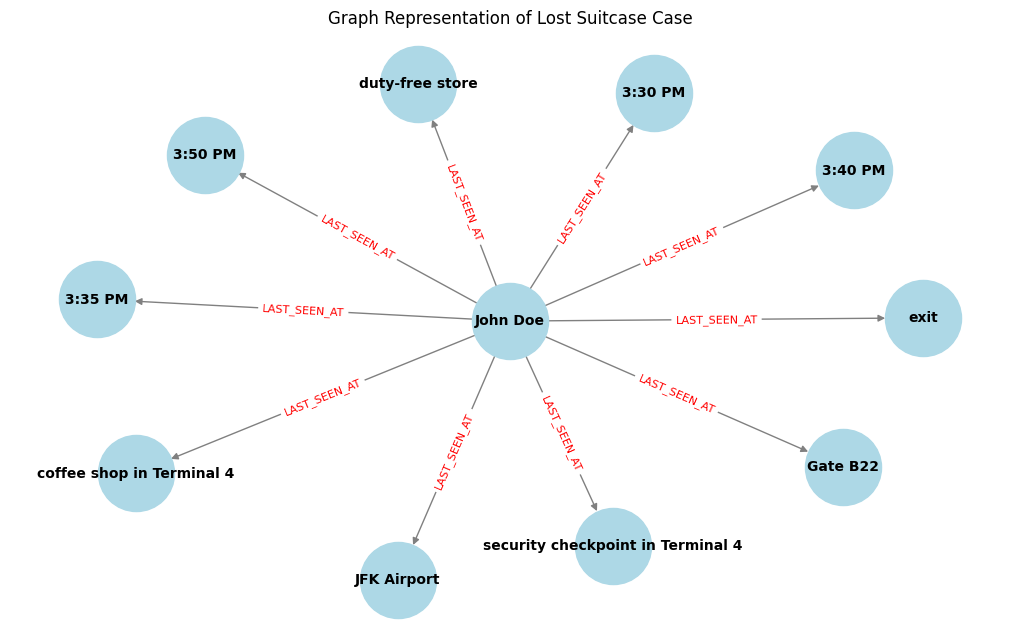

In [32]:
# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph._graph)
    labels = nx.get_edge_attributes(graph._graph, 'relation')
    nx.draw(graph._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph._graph, pos, edge_labels=labels, font_size=8, font_color='red')
    plt.title("Graph Representation of Lost Suitcase Case")
    plt.show()

# Call visualization function
visualize_graph(graph)

Extracted Nodes:
[('near the duty-free store', {'type': 'Location'}), ('John Doe', {'type': 'Person'}), ('passenger logs', {'type': 'Item'}), ('near a coffee shop in Terminal 4', {'type': 'Location'}), ('JFK Airport', {'type': 'Location'}), ('security checkpoint in Terminal 4', {'type': 'Location'}), ('black Samsonite suitcase', {'type': 'Item'}), ('suitcase', {'type': 'Item'}), ('3:30 PM', {'type': 'Event'}), ('the case', {'type': 'Event'}), ('an unknown individual', {'type': 'Person'}), ('security team', {'type': 'Person'}), ('near the coffee shop in Terminal 4', {'type': 'Location'}), ('airport authorities', {'type': 'Person'}), ('3:40 PM', {'type': 'Event'}), ('3:35 PM', {'type': 'Event'}), ('3:50 PM', {'type': 'Event'})]

Extracted Edges:
[('John Doe', 'JFK Airport', {'relation': 'LAST_SEEN_AT'}), ('John Doe', 'security checkpoint in Terminal 4', {'relation': 'LAST_SEEN_AT'}), ('John Doe', '3:30 PM', {'relation': 'LAST_SEEN_AT'}), ('black Samsonite suitcase', 'security checkpoint 

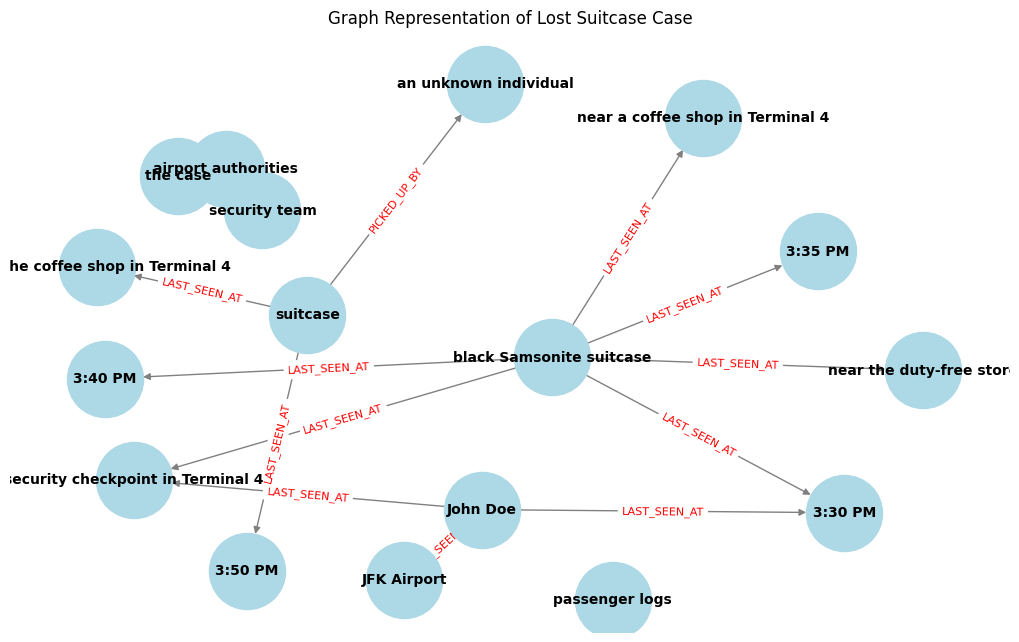

In [33]:
# Improved Input text - Lost suitcase scenario with clearer relationships
doc_text = """
Incident Report: Lost Suitcase at JFK Airport

John Doe, a traveler, reported losing his black Samsonite suitcase at JFK Airport on February 20th at 3:45 PM.
He last physically saw the suitcase at the security checkpoint in Terminal 4 at 3:30 PM before proceeding towards Gate B22 for his flight to London.

The suitcase was recorded on CCTV footage at 3:35 PM near the duty-free store, and at 3:40 PM near a coffee shop in Terminal 4.
At 3:50 PM, security footage showed an unknown individual picking up a suitcase near the coffee shop and walking towards the exit.

The airport authorities and security team are currently investigating the case, reviewing CCTV footage, and checking passenger logs to determine whether it was misplaced, stolen, or mistakenly taken by another passenger.
"""

documents = [Document(page_content=doc_text)]

# Initialize the Graph Transformer
llm_transformer = LLMGraphTransformer(llm=llm)
graph_documents = llm_transformer.convert_to_graph_documents(documents)

# Filter Graph Transformer
llm_transformer_filtered = LLMGraphTransformer(
    llm=llm,
    allowed_nodes=["Person", "Item", "Location", "Event"],
    allowed_relationships=["LAST_SEEN_AT", "OWNED_BY", "INVESTIGATED_BY", "RECORDED_BY", "CONNECTED_TO", "CONTAINS", "PICKED_UP_BY"],
)
graph_documents_filtered = llm_transformer_filtered.convert_to_graph_documents(documents)

# Create NetworkX Graph
graph = NetworkxEntityGraph()

# Manually add nodes and edges
for doc in graph_documents_filtered:
    for node in doc.nodes:
        graph._graph.add_node(node.id, type=node.type)
    for edge in doc.relationships:
        graph._graph.add_edge(edge.source.id, edge.target.id, relation=edge.type)

# Debugging: Print extracted nodes and edges
print("Extracted Nodes:")
print(graph._graph.nodes(data=True))
print("\nExtracted Edges:")
print(graph._graph.edges(data=True))

# Initialize the GraphQAChain
chain = GraphQAChain.from_llm(llm=llm, graph=graph, verbose=True)

# Query the graph
question = "Where was John Doe's suitcase last seen?"
response = chain.run(question)
print("\nGraph Query Response:", response)



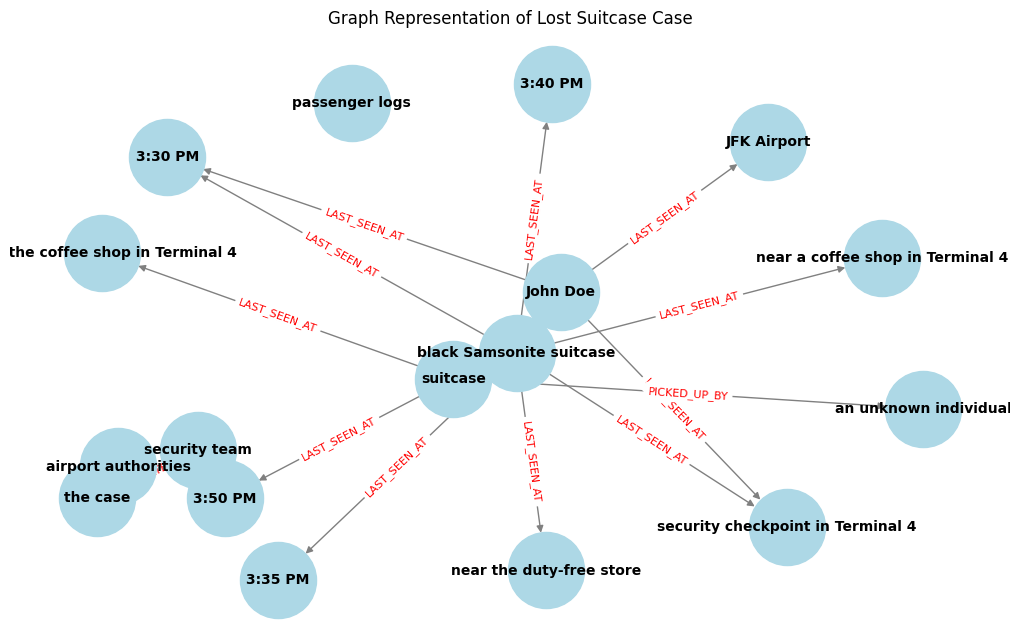

In [37]:
# Visualize the graph
def visualize_graph(graph):
    plt.figure(figsize=(10, 6))
    pos = nx.spring_layout(graph._graph)
    labels = nx.get_edge_attributes(graph._graph, 'relation')
    nx.draw(graph._graph, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10, font_weight='bold')
    nx.draw_networkx_edge_labels(graph._graph, pos, edge_labels=labels, font_size=8, font_color='red')
    plt.title("Graph Representation of Lost Suitcase Case")
    plt.show()

# Call visualization function
visualize_graph(graph)